In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def rsquare(x,z,degree=1):
    '''
    Entrada:
    x = posição em x
    z = posição em z ou y
    degree = ordem da função
    Saída:
    r2 = r quadrado
    coeffs[0] = a inclinação
    coeffs[1] = b
    '''
    coeffs = np.polyfit(x,z,degree)
    p = np.poly1d(coeffs)
    zhat = p(x)
    zbar = np.sum(z)/len(z)
    ssreg = np.sum((zhat-zbar)**2)
    sstot = np.sum((z-zbar)**2)
    r2 = ssreg/sstot
    return r2, coeffs[degree-1:degree+1]
def selectway(data,anchor,theta,error):
    '''
    Entrada:
    data = matriz[m,n]
    anchor = ponto de referência [i,j]
    theta = ângulo de rotação
    error = erro aceitável
    Saída:
    x = posição x
    z = posição z
    '''
    #equação da reta y = tan(thetta)*x+b
    b = anchor[1]-round(np.tan(np.radians(theta)),2)*anchor[0]
    x, z = np.zeros(len(data[0,:])*3), np.zeros(len(data[1,:])*3)
    count = 0
    for i in range(0,len(data[0,:])):
         for j in range(0,len(data[1,:])):
                if b-error<=j-round(np.tan(np.radians(theta)),2)*i and j-round(np.tan(np.radians(theta)),2)*i<=b+error:
                    x[count] = round(np.cos(np.radians(theta))*i + np.sin(np.radians(theta))*j,2)
                    z[count] = data[i,j]
                    count+=1
    z = z[0:np.count_nonzero(z)]
    x = x[0:len(z)]
    return x, z

r2 0.12346120065061567
coeffs [0.24751348 2.82212098]


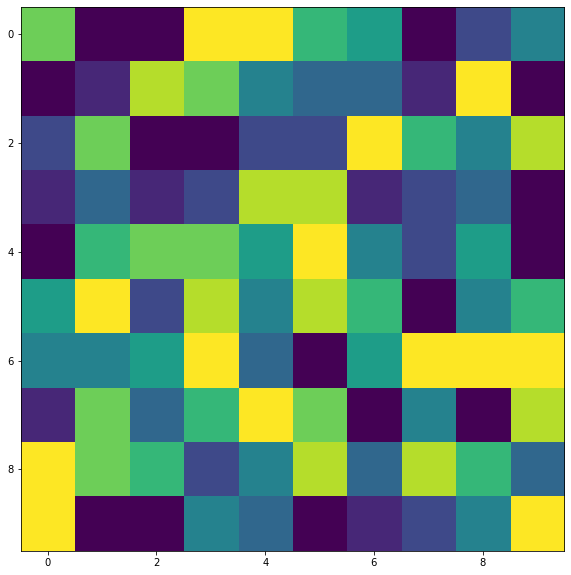

In [14]:
data = np.random.randint(10, size=(10,10)) #cria matriz aleatoria
#plot 2d
plt.figure(figsize=(10,10))
plt.imshow(data)
#calcula rsquare na direção theta
x,z = selectway(data,[0,0],45,0.5)
r2, coeffs = rsquare(x,z)
print('r2',r2)
print('coeffs',coeffs)